# HOUSE PRICES

Pricing is one of the most searched areas in many industries, since it allows companies to get ahead of the game of sales. Concretely, finding out which are the house features that influence on the price of a house will give the key to predict the price of houses in the market.

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges to predict the final price of each home.

# Data cleaning

Let's start importing some libraries for EDA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats # Correlation analysis
import scipy.stats as ss

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Upload training dataset and explore the data:

In [2]:
train = pd.read_csv("train.csv")
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
def correlation_heatmap(df):
    
    """Display numerical correlations between features on heatmap."""

    sns.set(font_scale=1.1)
    train_corr = df.corr()
    mask = np.triu(train_corr.corr())
    plt.figure(figsize=(20, 20))
    sns.heatmap(train_corr, annot=True, fmt='.1f', cmap='coolwarm', square=True, mask=mask, linewidths=1, cbar=False)

    plt.show()

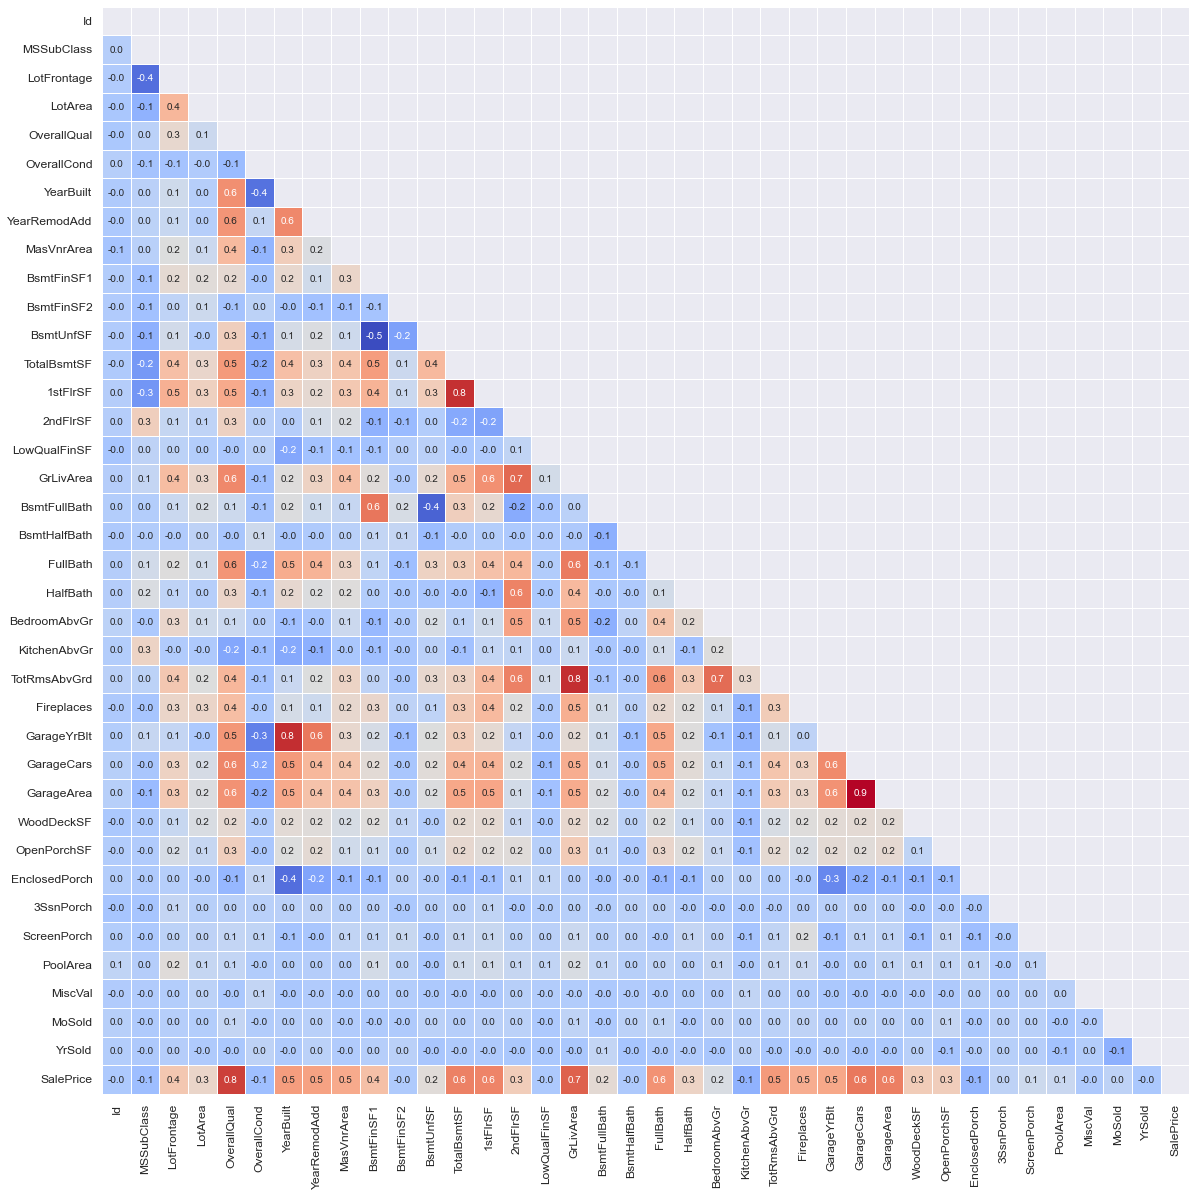

In [4]:
correlation_heatmap(train)

In [5]:
test = pd.read_csv("test.csv")
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

Resize the maximum number of columns and rows that can be displayed to view all the columns:

In [8]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)

Drop useless columns and missing data on target variable. Separate target variable and merge train and test features to avoid repeating the cleaning task for each set.

In [9]:
# Drop Id column
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# Drop rows that are NaN on the target column:
train.dropna(subset=['SalePrice'], axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)

# Separate target variable from train data
y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Merge train and test sets
X = pd.concat([train_features, test_features]).reset_index(drop=True)
X.shape

(2919, 79)

Overview of the data:

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

There are some fetures that are numerical but should be treated as categorical:

In [11]:
X['MSSubClass'] = X['MSSubClass'].astype(str)

X['YrSold'] = X['YrSold'].astype(str)

X['MoSold'] = X['MoSold'].astype(str)

In [12]:
# Describe numeric data
X.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0


In [13]:
# Describe object data
X.describe(include='O').T

,count,unique,top,freq
MSSubClass,2919,16,20,1079
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443


## Missing values

We saw many NaN values on the dataframe overview. Let's calculate the percentage of the missing values in each attribute:

In [14]:
X.isnull().mean().any()

True

Collect the features that have missing values

In [15]:
missing_values = [nan for nan in X.columns if X[nan].isnull().mean() > 0]
missing_values

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

Show for each feature the same as value_counts function but including the NaN values:

In [16]:
for feature in missing_values:
    val_counts = X.groupby([feature], dropna=False, as_index=False).size().sort_values(by='size',ascending=False)
    print(val_counts)

  MSZoning  size
3       RL  2265
4       RM   460
1       FV   139
2       RH    26
0  C (all)    25
5      NaN     4
     LotFrontage  size
128          NaN   486
36          60.0   276
56          80.0   137
46          70.0   133
26          50.0   117
..           ...   ...
110        136.0     1
109        135.0     1
107        133.0     1
106        131.0     1
3           25.0     1

[129 rows x 2 columns]
  Alley  size
2   NaN  2721
0  Grvl   120
1  Pave    78
  Utilities  size
0    AllPub  2916
2       NaN     2
1    NoSeWa     1
   Exterior1st  size
12     VinylSd  1025
8      MetalSd   450
6      HdBoard   442
13     Wd Sdng   411
9      Plywood   221
5      CemntBd   126
3      BrkFace    87
14     WdShing    56
0      AsbShng    44
11      Stucco    43
2      BrkComm     6
1      AsphShn     2
4       CBlock     2
10       Stone     2
7      ImStucc     1
15         NaN     1
   Exterior2nd  size
13     VinylSd  1014
8      MetalSd   447
6      HdBoard   406
14     Wd Sd

In [17]:
# Unite features and values and create dataframe from array
nan_values = X[missing_values].isnull().mean()
nan_values = pd.DataFrame(nan_values.reset_index())#.rename(columns = {'index':'Feature', 0:'Null%'})
# Add column names
nan_values.columns = ['Feature', 'Null%']

# Show data types
data_type = [X[i].dtype for i in nan_values['Feature']]
nan_values['Data_type'] = data_type

# Transform mean into a percentage
nan_values['Null%'] = (nan_values['Null%']*100).round(decimals = 2)
# Sort values
nan_values.sort_values('Null%', ascending=False, inplace=True)
# Add a color gradient
color = sns.light_palette("pink", as_cmap=True)
nan_values.style.background_gradient(cmap=color)

,Feature,Null%,Data_type
30,PoolQC,99.660000,object
32,MiscFeature,96.400000,object
2,Alley,93.220000,object
31,Fence,80.440000,object
22,FireplaceQu,48.650000,object
1,LotFrontage,16.650000,float64
25,GarageFinish,5.450000,object
28,GarageQual,5.450000,object
29,GarageCond,5.450000,object
24,GarageYrBlt,5.450000,float64


We will keep the following features in check for the future correlations, since they are missing more than the 30% of their values and hence they might present some bias or inaccuracies.

In [18]:
risky_cols = [row['Feature'] for i,row in nan_values.iterrows() if row['Null%'] > 30]
risky_cols

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

Judging by the data description document, it is clear that many of these NaN values for the categorical features are actually "NA - No Feature". We can see from this document that the following features have the option "NA" or "None":
- Alley: NA - No alley access
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: NA - No Basement
- FireplaceQu: NA - No Fireplace
- GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt: NA - No Garage
- PoolQC: NA - No Pool
- Fence: NA - No Fence
- MiscFeature: NA - None
- MasVnrType: None

According to the data description file, the MasVnrType feature has "None" instead of "NA" for None values. In order to have consistency on the dataset, since the rest of the features apply "NA" for None values, we will impose that "None" is changed to "NA" for this feature as well:

In [19]:
X.loc[(X['MasVnrType'] == 'None'), 'MasVnrType'] = "NA"

Then:
- NaN will be substituted by "NA" in the case of the categorical features
- Their corresponding numerical features will be put to 0 (ex. GarageYrBlt for GarageType).
- The remaining NaN are actual missing data that mainly can be replaced by the mode (most frequent value).
- MSZoning and LotFrontage will be approached differently: since they are strongly related to MSSubClass and Neighborhood, respectively, we will use these categories to fill the missing values.

In [20]:
# List of columns where NaN means NA:
list_NA = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

# Directly related to the previous list, for example, if there is no garage, then the garage area should be 0.
# List of columns where NaN means 0:
list_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

# List columns where NaN is actually missing data that will be replaced with mode:
list_missing = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'SaleType', 'Utilities']

# Replacements:

for feature in list_NA:
    X[feature].replace(np.nan, 'NA', inplace=True)
    
for feature in list_zero:
    X[feature].replace(np.nan, 0.0, inplace=True)

for feature in list_missing:
    X[feature].replace(np.nan, X[feature].mode()[0], inplace=True)

In [21]:
# Filling MSZoning according to MSSubClass:
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].apply(lambda val: val.fillna(val.mode()[0]))

In [22]:
# Filling MSZoning according to Neighbourhood:
#X['LotFrontage'] = X.groupby(['Neighborhood'])['LotFrontage'].apply(lambda val: val.fillna(val.median()))
X['LotFrontage'] = X.groupby(['Neighborhood'])['LotFrontage'].apply(lambda val: val.fillna(val.mode()[0]))

All values have been substituted:

In [23]:
X.isnull().mean().any()

False

The case of MasVnrType variable is somewhat particular: 
- There are some cases where the feature is NA but the Area is higher than 0, which might not be correct.
- There are also cases where the feature is NOT NA but the Area is 0, which might be wrong as well.

In [24]:
X['MasVnrType'].value_counts()

NA         1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [25]:
test = X.loc[(X['MasVnrType'] == 'NA') & (X['MasVnrArea'] == 0)]
test.shape

(1758, 79)

In [26]:
X.loc[(X['MasVnrType'] == 'NA') & (X['MasVnrArea'] > 0), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,NA,288.0
773,NA,1.0
1230,NA,1.0
1300,NA,344.0
1334,NA,312.0
1669,NA,285.0
2452,NA,1.0
2610,NA,198.0


In [27]:
X.loc[(X['MasVnrType'] != 'NA') & (X['MasVnrArea'] == 0), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0
2319,BrkFace,0.0


For the cases where the feature is None, the Area will be set to 0, and for the cases where the feature is not None and the Area is 0, the Area will be set to the median for that type of feature.

In [28]:
X.loc[(X['MasVnrType'] == 'NA') & (X['MasVnrArea'] > 0), 'MasVnrArea'] = 0.0

In [29]:
list_freq = X.loc[(X['MasVnrType'] != 'NA') & (X['MasVnrArea'] == 0), 'MasVnrType'].to_list()

for feature_type in list_freq:
    median_value = X.loc[(X['MasVnrType'] == feature_type), 'MasVnrArea'].median(axis=0)
    X.loc[(X['MasVnrType'] != 'None') & (X['MasVnrArea'] == 0), 'MasVnrArea'] = median_value

We separate the train and test sets for the correlation analysis, and also unite the features with the target:

In [30]:
# Separating train and test set again
X_train = X.iloc[:len(y), :]
X_test = X.iloc[len(train):, :]
y_train = y.copy()

# Uniting features and target again for correlation analysis
#train = X_train.copy()
#train['SalePrice'] = y_train

In [31]:
# Setting model data
#y = np.log1p(y)

In [32]:
print("~"*127*2)
print("                                                 Code in construction!")
print("~"*127*2)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                                 Code in construction!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Categorical Data

In [33]:
df = train.copy()
target = 'SalePrice'

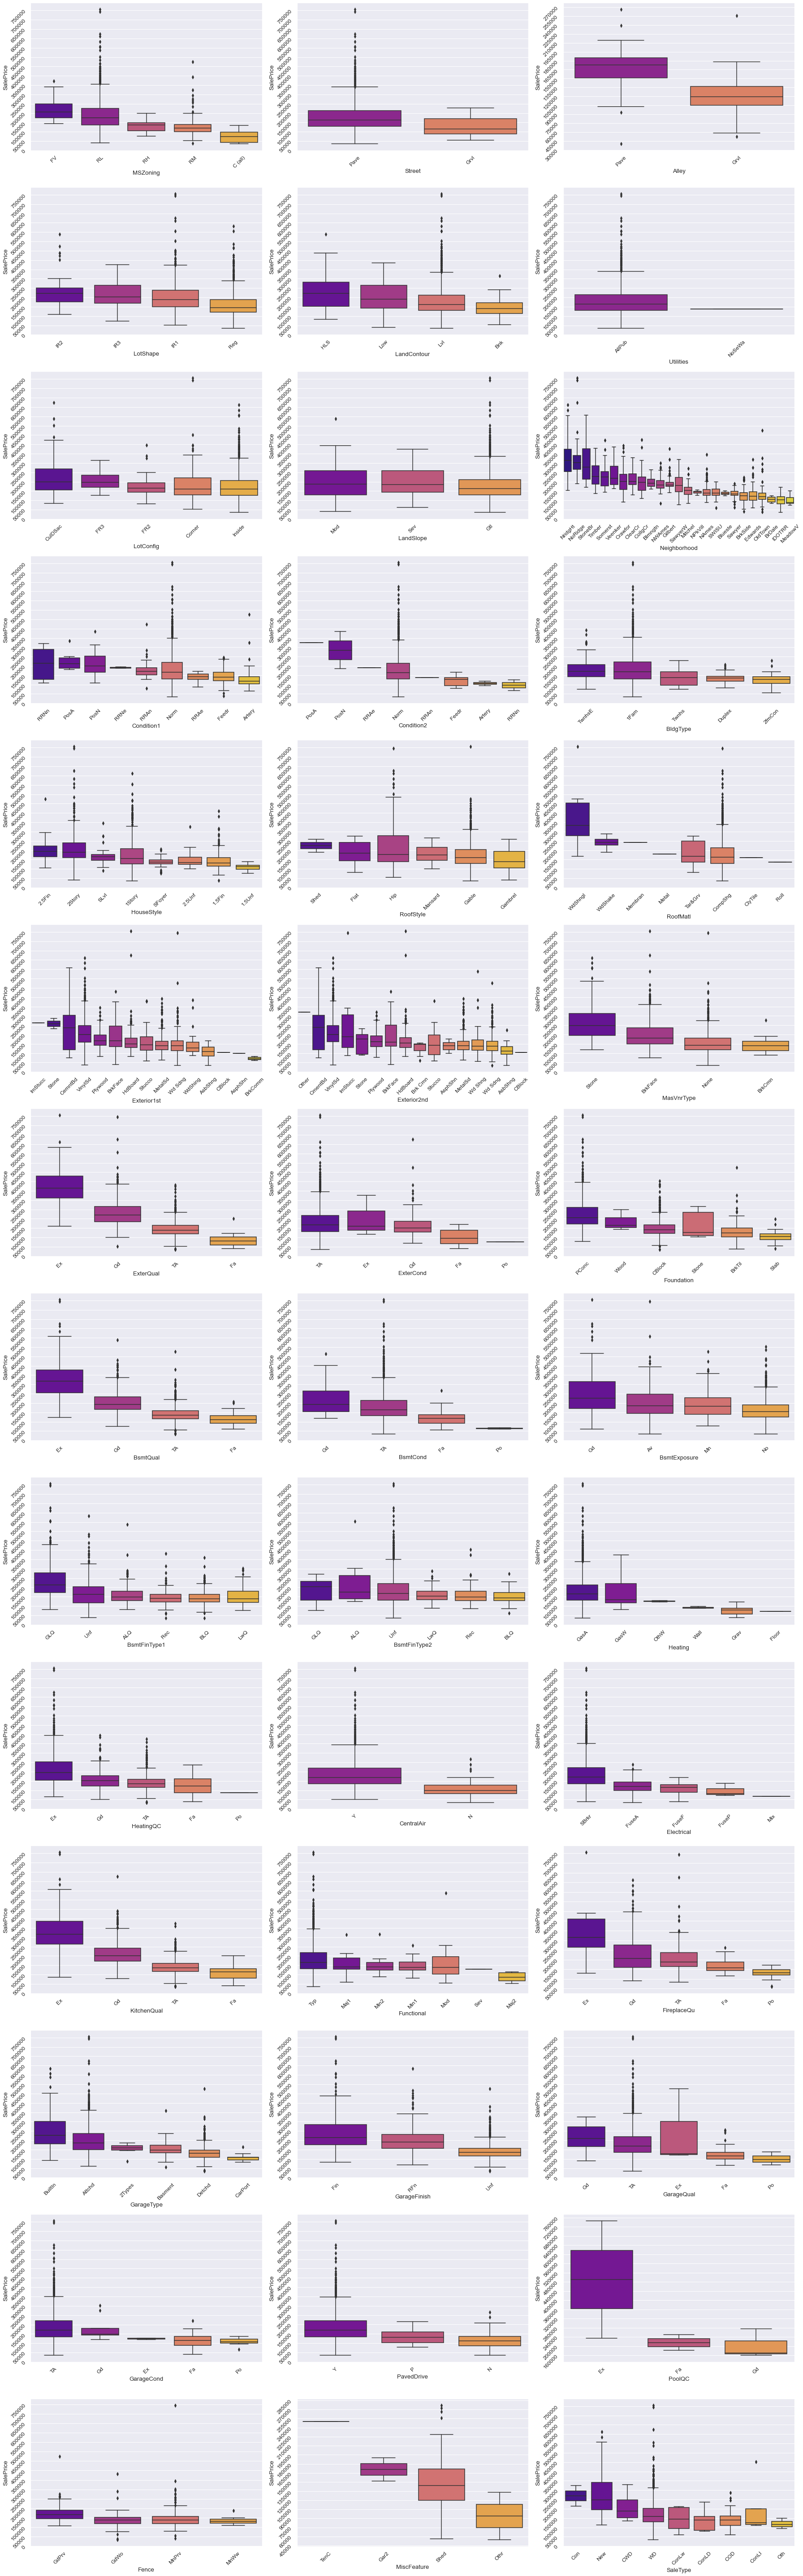

In [34]:
# The subplots function returns a tuple containing a figure and axes objects
# The fig only keeps the image, which can be later used to save it
# The axes keeps the plotting objects, which we will use to form the figure
fig, axes = plt.subplots(14, 3, figsize=(25, 80))
axes = axes.flatten()

# Extract the categorical features columns
#train_objcols = df.select_dtypes(include=['object']).columns
# Zip them with the axes
#zip_obj = zip(train_objcols, axes)


#for i,j in zip_obj:
for i, j in zip(df.select_dtypes(include=['object']).columns, axes):
    
    # Sort the categories for each feature so they appear ordered in the plot
    sortd = df.groupby([i])[target].median().sort_values(ascending=False)
    sns.boxplot(x=i,
                y=target,
                data=df,
                palette='plasma',
                order=sortd.index,
                ax=j)
    j.tick_params(labelrotation=45)
    j.yaxis.set_major_locator(MaxNLocator(nbins=18))

    plt.tight_layout()

### Box plots Observations
- MSZoning: FV highest median value, C lowest, RL and RH similar; RL and RM have many outliers. RL >350000
- Street: Pave has many outliers (>350000), Grvl has a lower median.
- Alley: great difference between Pave and Grvl.
- LandContour: HLS bit higher median, Bnk lowest, Lvl many outliers >350000.
- Neighborhood: NridgHt, NoRidge, StoneBr have top sale prices; Timber, Somerst, Veenker, ClearCr, CollgCr, Blmngtn, NWAmes, Gilbert have above average sale prices; Crawfor, SawyerW have big range of sale prices; Mitchel, NPkVill, NAmes, SWISU, Blueste, Sawyer, BrkSide, Edwards, OldTown have below average sale prices; BrDale, IDOTRR, MeadowV have the lowest sale prices, with Meadow the one that has the smallest median value.
- Conditions: PosN/PosA seem to increase the price, and RRNn seems to decrease it.
- RoofMatl: CompShg has many outliers >350000, WdShngl seems to increase the price.
- MasVNrType: great difference between Stone and BrkComn.
- ExteriorQual: great diff between all types
- BsmtQual: great diff between all types, some outliers.
- BsmtCond: some diff between Gd and Po, but many outliers for TA>350000.
- Heating: GasA has a great range of prices and outliers; wall, Grav and Floor have lower prices and limited range.
- HeatingQC: diff betweer Ex and Fa/Po, but outliers for Ex (>400000), Gd (>250000) and TA (>225000).
- CentralAir: great diff between Y/N.
- Electrical: SBrkr has highest median and outliers than the rest.
- KitchenQual: good diff between all types, but some outliers (Ex>550000, Gd>350000, TA>225000).
- FireplaceQu: great diff between Ex and Fa/Po; many outliers for Ex(>700000), Gd (>450000) and, TA (>350000).
- GarageType: some diff between BuiltIn/Attchd and Detchd/CarPort, but many outliers.
- PoolQC: great diff between Ex and Fa/Gd. No outliers.

### Outliers

In [35]:
#!pip install feature_engine

In [36]:
#from feature_engine.outliers import Winsorizer

def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [37]:
outliers = ['MSSubClass',
'LotFrontage',
'LotArea',
'OverallCond',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtHalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold']

In [ ]:
for i in outliers:
    # finding the outliers
    upper_limit, lower_limit = find_boundaries(X_train, i)

    # Now replacing the outliers by the maximum and minimum limit
    X_train[i] = np.where(X_train[i] > upper_limit, upper_limit,
                           np.where(X_train[i] < lower_limit, lower_limit, X_train[i]))
    X_test[i] = np.where(X_test[i] > upper_limit, upper_limit,
                       np.where(X_test[i] < lower_limit, lower_limit, X_test[i]))

In [ ]:
# Converting some of the categorical values to numeric ones.
# From https://www.kaggle.com/code/datafan07/beginner-eda-with-feature-eng-and-blending-models/notebook

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

features['Neighborhood'] = features['Neighborhood'].map(neigh_map).astype(
    'int')
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['ExterQual'] = features['ExterQual'].map(ext_map).astype('int')
features['ExterCond'] = features['ExterCond'].map(ext_map).astype('int')
bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['BsmtQual'] = features['BsmtQual'].map(bsm_map).astype('int')
features['BsmtCond'] = features['BsmtCond'].map(bsm_map).astype('int')
bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

features['BsmtFinType1'] = features['BsmtFinType1'].map(bsmf_map).astype('int')
features['BsmtFinType2'] = features['BsmtFinType2'].map(bsmf_map).astype('int')
heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['HeatingQC'] = features['HeatingQC'].map(heat_map).astype('int')
features['KitchenQual'] = features['KitchenQual'].map(heat_map).astype('int')
features['FireplaceQu'] = features['FireplaceQu'].map(bsm_map).astype('int')
features['GarageCond'] = features['GarageCond'].map(bsm_map).astype('int')
features['GarageQual'] = features['GarageQual'].map(bsm_map).astype('int')

## Correlation

Let's explore now the correlation between the features:

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

In [38]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention:

- p-value  <  0.001: strong evidence that the correlation is significant
- p-value  <  0.05: moderate evidence that the correlation is significant
- p-value  <  0.1: weak evidence that the correlation is significant
- p-value  >  0.1: no evidence that the correlation is significant

Let's start with numerical values:

In [39]:
features = []
df_Pcorr = []
df_Pval = []
# loop over numerical features to get the pearson correlation and the p value for each:
for i,row in train_num.iterrows():
    feature = row['Feature']
    pearson_coef, p_value = stats.pearsonr(train[feature], train['SalePrice'])
    features.append(feature)
    df_Pcorr.append(pearson_coef)
    df_Pval.append(p_value)

NameError: name 'train_num' is not defined

In [ ]:
# Create dataframe from arrays
df_corr = pd.DataFrame(features)

# Add column names
df_corr.columns = ['Feature']

# Add other columns
df_corr['PearsonCorr'] = df_Pcorr
df_corr['Pvalue'] = df_Pval

# Drop the target row and sort values
df_corr.drop(df_corr.loc[df_corr['Feature']==target].index, inplace=True)
df_corr.sort_values('Pvalue', ascending=True, inplace=True)
#color = sns.light_palette("pink", as_cmap=True)
#colored_df = df_corr.style.background_gradient(cmap=color)
df_corr

In [ ]:
interest_feature = [row['Feature'] for i,row in df_corr.iterrows() if abs(row['PearsonCorr']) > 0.5 and row['Pvalue']<0.001]
interest_feature

Let's create another function for this:

In [ ]:
def get_corr_features(num_features, dataset, target):
    
    """
    This function calculates the Pearson Correlation Coefficient and the p value of certain numerical features (num_features)
    of a dataset with a specific target. It creates a dataframe with these values and returns it.
    It also returns a list of features that have a Pearson Correlation higher than 0.5 and a p value lower than 0.001,
    ordered by "priority".
    """
    
    features = []
    df_Pcorr = []
    df_Pval = []
    # loop over numerical features to get these stats:
    for i,row in num_features.iterrows():
        feature = row['Feature']
        pearson_coef, p_value = stats.pearsonr(dataset[feature], dataset[target])
        features.append(feature)
        df_Pcorr.append(pearson_coef)
        df_Pval.append(p_value)
    
    # Create dataframe from arrays
    df_corr = pd.DataFrame(features)
    # Add column names
    df_corr.columns = ['Feature']
    # Add other columns
    df_corr['PearsonCorr'] = df_Pcorr
    df_corr['Pvalue'] = df_Pval

    # Drop the target row and sort values
    df_corr.drop(df_corr.loc[df_corr['Feature']==target].index, inplace=True)
    df_corr.sort_values('Pvalue', ascending=True, inplace=True)
    
    # List of features that have a Pearson Correlation higher than 0.5 and a p value lower than 0.001,  ordered by "priority"
    interest_feature = [row['Feature'] for i,row in df_corr.iterrows() if abs(row['PearsonCorr']) > 0.5 and row['Pvalue']<0.001]
    
    print('Features with a Pearson correlation > 0.5 and p value < 0.001:', interest_feature)
    
    return df_corr, interest_feature

In [ ]:
train_corr_num, corr_features_num = get_corr_features(train_num, train, target='SalePrice')

In [ ]:
train

It's the turn of object features. First, we need to check the number of outcomes each feature can have:

In [ ]:
for i,row in train_obj.iterrows():
    feature = row['Feature']
    print(feature)
    print(train[feature].value_counts().count())

As we can see, features that have the majority of it's results in one outcome, are not usefull to discern patterns. For example, "Street" has 1454 results for "Pave" and 6 results for Grvl, and "Utilities", has 1459 results for "AllPub" and 1 for NoSeWa.

To start at some point, we can filter out those features whose most frequent outcome has more than 75% of the results:

In [ ]:
train_descr = train.describe(include='O').T
train_descr

In [ ]:
obj_consider = [i for i,row in train_descr.iterrows() if row['freq'] < train.shape[0]*0.75]
obj_consider

We will use indicator variables so we can use categorical variables for regression analysis in the later modules.

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [ ]:
X_obj = train.copy()

all_features_corr = train.describe(include='all').T
all_features = [i for i, row in all_features_corr.iterrows()]

for feature in all_features:
#for feature,row in train_descr.iterrows():
#for feature in obj_consider:

    if feature in obj_consider:
    # get dummies
        dummy_var = pd.get_dummies(train[feature])

        # Number of outcomes for feature
        #num_outcomes = train[feature].value_counts().count()
        #for x in range(num_outcomes):

        for column in dummy_var:
            #print(test[column].name)
            # Rename variable
            dummy_var.rename(columns={dummy_var[column].name:feature+'-'+dummy_var[column].name}, inplace=True)
    
        # Concat dataset with dummy 
        X_obj = pd.concat([X_obj, dummy_var], axis=1)
        
    # drop original column from dataset
    X_obj.drop(feature, axis = 1, inplace=True)
    
X_obj

Trying to obtain the Pearson correlation with one-hot encoding for each feature could end up with a matrix that is too complex to extract eny information from it.

We’re looking for a measure of association between two categorical features. Cramér’s V is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:

- Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association.
- Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

In [ ]:
def cramers_v(x, y):
    """
    Fuction extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    WARNING: This function works specifically to calculate the association between two categorical features (no mix
    with numerical!!)
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
features = []
cramersv = []
target = 'SalePrice'
# loop over object features to get the stats:
for i,row in train_obj.iterrows():
    feature = row['Feature']
    corr = cramers_v(train[feature], train[target])
    features.append(feature)
    cramersv.append(corr)

# Create dataframe from arrays
df_cram = pd.DataFrame(features)
# Add column names
df_cram.columns = ['Feature']
# Add other columns
df_cram['Cramers_v'] = cramersv
df_cram.sort_values('Cramers_v', ascending=False, inplace=True)
df_cram

These are the categorical features we could choose, but the numbers are quite poor. The reason for this is that the Cramér’s V is a method that works comparing categoricla features alone.

In [ ]:
corr_features_obj = [row['Feature'] for i,row in df_cram.iterrows() if row['Cramers_v'] > 0.35]
corr_features_obj

The Correlation Ratio would be much more appropriate for our endeavour, because it allows the mix of categorical and numerical variables. It is defined as the weighted variance of the mean of each category divided by the variance of all samples; it answers the following question: Given a continuous number, how well can you know to which category it belongs to? The output is too on the range of [0,1].

In [ ]:
def correlation_ratio(categories, measurements):
    """
    Fuction extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    """
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
corr_ratio = []
features = []

for i,row in train_obj.iterrows():
    feature_obj = row['Feature']
    category = train[feature_obj]
    measure = train['SalePrice']
    eta = correlation_ratio(category, measure)
    
    features.append(feature_obj)
    corr_ratio.append(eta)
    
# Create dataframe from arrays
df_corr_ratio = pd.DataFrame(features)
# Add column names
df_corr_ratio.columns = ['Feature']
# Add other columns
df_corr_ratio['Correlation_Ratio'] = corr_ratio
df_corr_ratio.sort_values('Correlation_Ratio', ascending=False, inplace=True)
df_corr_ratio

In [ ]:
corr_features_obj = [row['Feature'] for i,row in df_corr_ratio.iterrows() if row['Correlation_Ratio'] > 0.5]
corr_features_obj

From these results we can see that the previous method could give an idea of the association but some of the possible features weren't actually a good option, like "Street".\
This is hence the list of attributes we will concentrate on for the following analysis:

In [ ]:
corr_features = corr_features_num + corr_features_obj
corr_features